<a href="https://colab.research.google.com/github/BharathM-20/Customer_churn/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle



In [83]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [84]:
df.shape

(7043, 21)

In [85]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [86]:
pd.set_option("display.max_columns",None)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [88]:
# dropping customerID column as it is not required
df = df.drop(columns=["customerID"], errors='ignore')

In [89]:
#printing the unique values in all coumns
numerical_features_list = ["tenure","MonthlyCharges","TotalCharges "]
for col in df.columns:
  if col not in numerical_features_list:
    print(col,df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [90]:
#df["TotalCharges"] = df["TotalCharges"].astype(float)

In [91]:
df[df["TotalCharges"]== " "]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [92]:
len(df[df["TotalCharges"]== " "])

11

In [93]:
df["TotalCharges"]= df["TotalCharges"].replace({" ": "0.0"})

In [94]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [95]:
#checking class distribution of target column
print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [96]:
#exploratory data analysis
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [97]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [98]:
def plot_histogram(df,column_name):
  plt.figure(figsize=(5,3))
  sns.histplot(df[column_name],kde=True)
  plt.title(f"Histogram of {column_name}")
  #calculate mean and median values for columns
  mean = df[column_name].mean()
  median = df[column_name].median()
  #add vertical lines for mean and median
  plt.axvline(mean,color="red",linestyle="--",label="Mean")
  plt.axvline(median,color="green",linestyle="-",label="Median")
  plt.legend()
  plt.show()


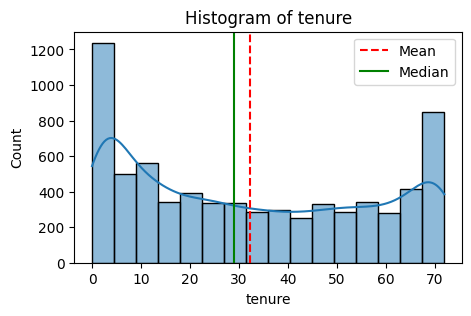

In [99]:
plot_histogram(df,"tenure")

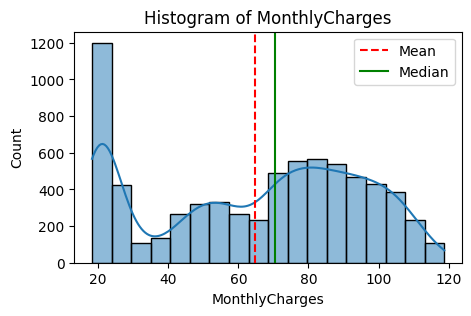

In [100]:
plot_histogram(df,"MonthlyCharges")

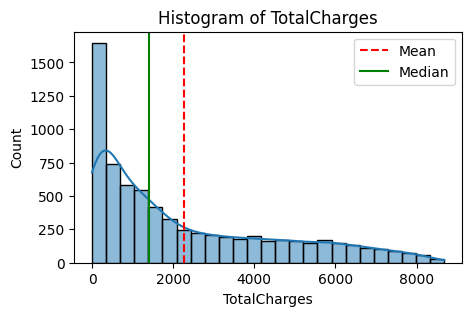

In [101]:
plot_histogram(df,"TotalCharges")

In [102]:
#plotting box plot
def plot_boxplot(df,column_name):
  plt.figure(figsize=(5,3))
  sns.boxplot(y = df[column_name])
  plt.title(f"Box plot of {column_name}")
  plt.ylabel(column_name)
  plt.show()

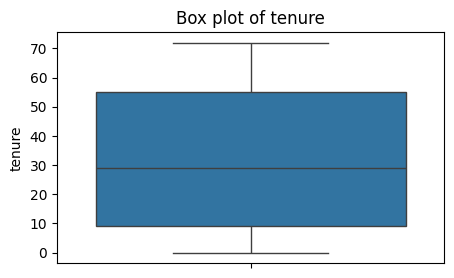

In [103]:
plot_boxplot(df,"tenure")

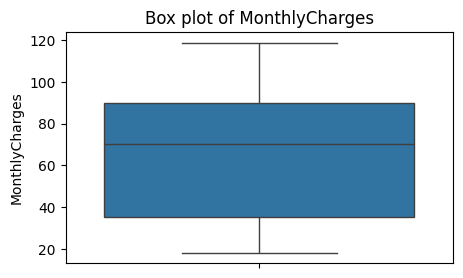

In [104]:
plot_boxplot(df,"MonthlyCharges")

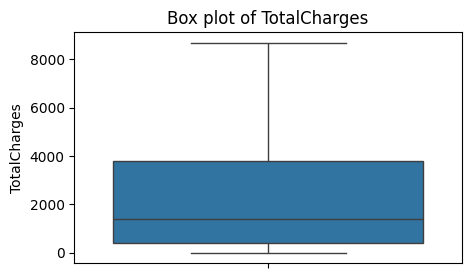

In [105]:
plot_boxplot(df,"TotalCharges")

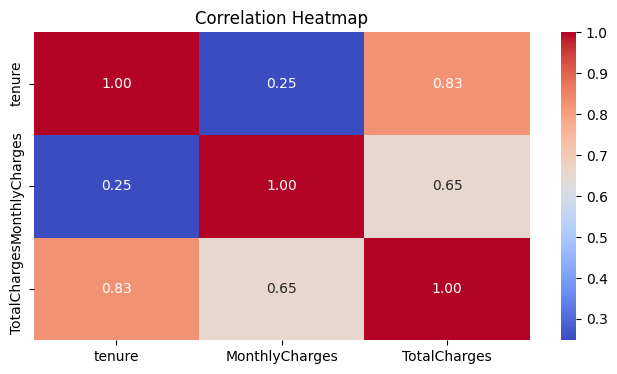

In [106]:
#correlation heatmap for numerical columns
plt.figure(figsize=(8,4))
sns.heatmap(df[["tenure","MonthlyCharges","TotalCharges"]].corr(),annot=True,cmap= "coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

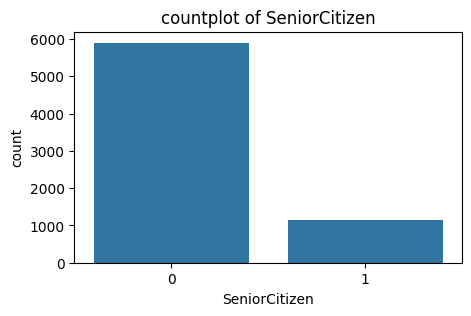

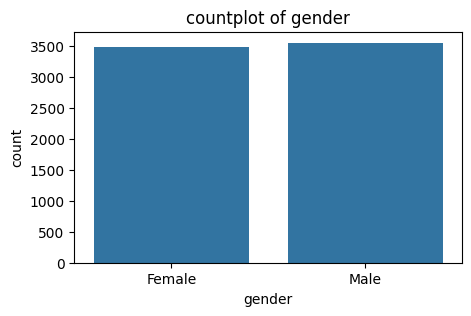

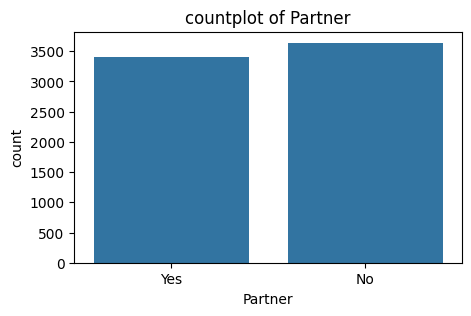

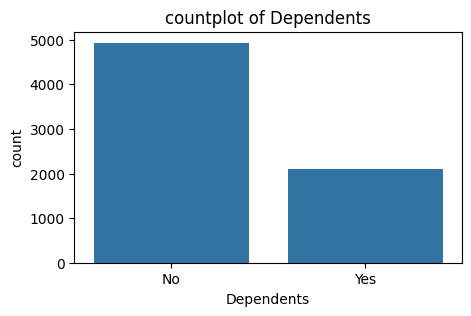

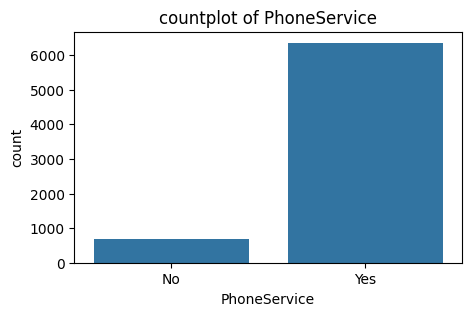

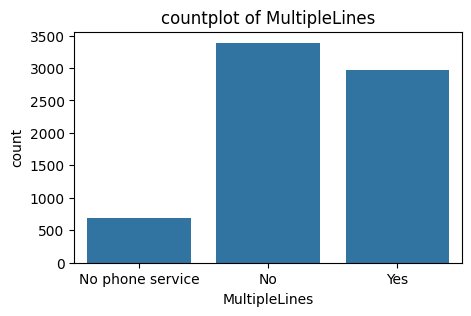

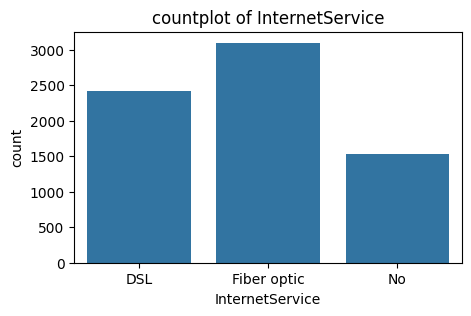

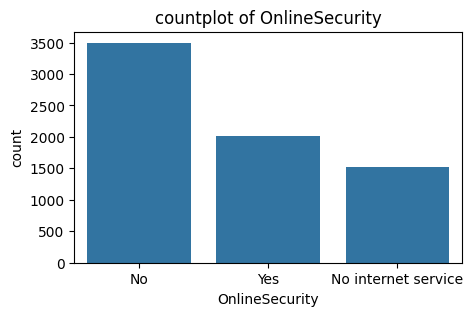

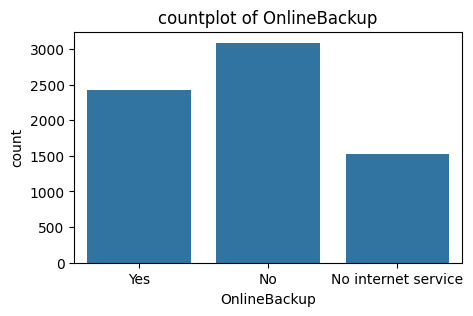

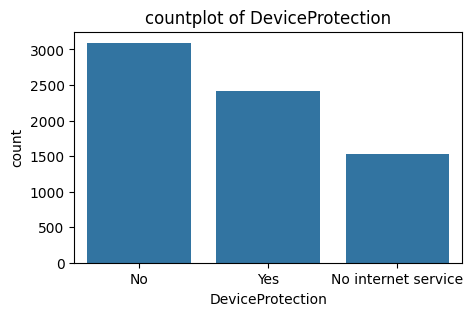

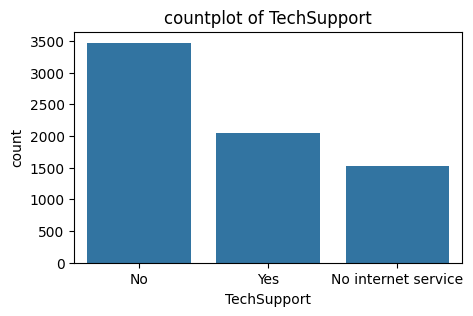

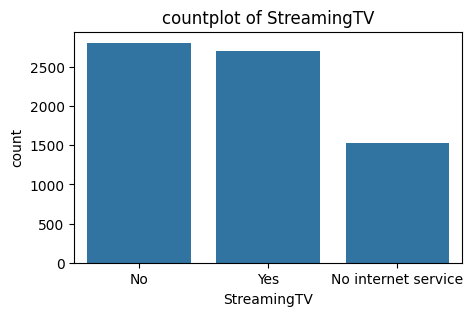

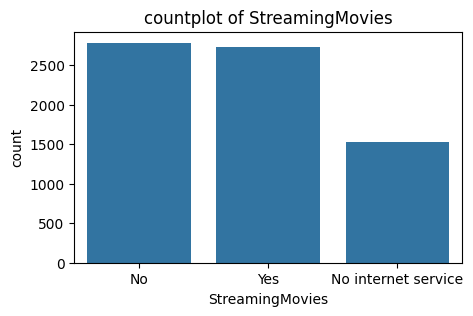

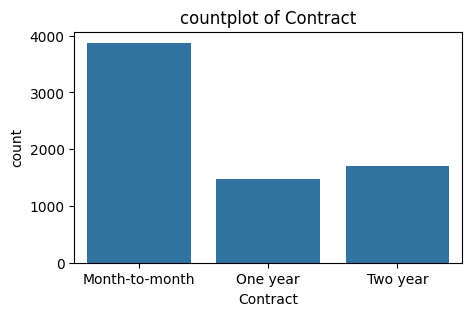

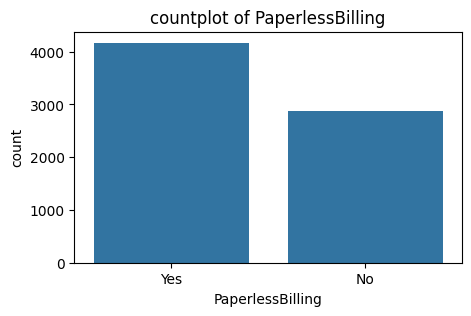

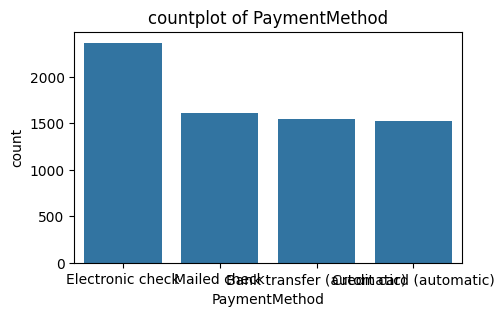

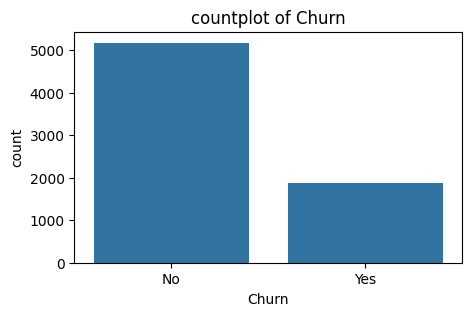

In [107]:
# categorical features analysis
object_cols = df.select_dtypes(include="object").columns.to_list()
object_cols = ["SeniorCitizen"] + object_cols
for col in object_cols:
  plt.figure(figsize=(5,3))
  sns.countplot(x=df[col])
  plt.title(f"countplot of {col}")
  plt.show()

In [108]:
#label encoding of target column
df["Churn"] = df["Churn"].replace({"Yes" :1 , "No" :0})

/tmp/ipython-input-4012828437.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes" :1 , "No" :0})


In [109]:
#label encoding of categorical features
object_columns = df.select_dtypes(include = "object").columns

In [110]:
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [111]:
#initialize a dictionary to store encoders
encoders = {}

#apply label encoding and store the encoders
for columns in object_columns:
  label_encoder = LabelEncoder()
  df[columns] = label_encoder.fit_transform(df[columns])
  encoders[columns] = label_encoder

#save the encoders to pickle file
with open("LabelEncoder.pkl","wb") as file:
  pickle.dump(encoders,file)

In [112]:
#splitting the features and target
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [113]:
print(X)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [114]:
#spliting training and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [115]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


In [116]:
smote = SMOTE(random_state=42)

In [117]:
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [118]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


In [119]:
#disctionary of models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

In [120]:
#dictionary to store cross validation results
cv_scores = {}

#perform 5-fold cross validation for each model
for model_name,model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model,X_train_smote,y_train_smote,cv=5,scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name}cross-validation accuracy:{np.mean(scores):.2f}")
  print("-"*70)
#


Training Decision Tree with default parameters
Decision Treecross-validation accuracy:0.78
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forestcross-validation accuracy:0.84
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoostcross-validation accuracy:0.83
----------------------------------------------------------------------


In [121]:
rfc = RandomForestClassifier(random_state=42)


In [122]:
rfc.fit(X_train_smote,y_train_smote)

RandomForestClassifier(random_state=42)

In [123]:
print(y_test.value_counts())

Churn
0    1036
1     373
Name: count, dtype: int64


In [124]:
#evaluate test data
y_test_pred = rfc.predict(X_test)
print("Accuracy score:\n",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("Classification report:\n",classification_report(y_test,y_test_pred))

Accuracy score:
 0.7785663591199432
Confusion Matrix:
 [[878 158]
 [154 219]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.59      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [125]:
#save the trained model as pickle file
model_data = {"model":rfc, "features names": X.columns.tolist()}
with open("customer_churn_model.pkl","wb") as file:
  pickle.dump(model_data,file)


In [126]:
#load the saved model and feature names
with open("customer_churn_model.pkl","rb") as file:
  model_data = pickle.load(file)

  loaded_model = model_data["model"]
  features_names = model_data["features names"]

In [127]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [131]:
input_data = {
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "No",
    "tenure": 1,
    "PhoneService": "No",
    "MultipleLines": "No phone service",
    "InternetService": "DSL",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "No",
    "StreamingMovies": "No",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": 29.85,
    "TotalCharges": 29.85
}
input_data_df = pd.DataFrame([input_data])
with open("LabelEncoder.pkl","rb") as file:
  encoders = pickle.load(file)
print(input_data_df.head())
#encode categorical features using the saved encoders
for column, encoder in encoders.items():
  input_data_df[column] = encoder.transform(input_data_df[column])

#making prediction
prediction = loaded_model.predict(input_data_df)
print(prediction)
prediction_prob = loaded_model.predict_proba(input_data_df)


#results
print(f"Predictions : {"Churn" if prediction[0] == 1 else "No Churn"}")
print(f"Prediction Probability : {prediction_prob}")

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges  
0              Yes  Electronic check           29.85         29.85  
[0]
Predictions : No Churn
Prediction Probability : [[0.78 0.22]]


In [132]:
input_data_df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
